# FlowDenoising User Manual

FlowDenoising is a low-pass filtering tool for volumetric data. A 1D Gaussian filter is applied to each dimension Z, Y and X (in this order), resulting in a 3D filtering. Unlike classical Gaussian filtering, the 2D slices (in each dimension) are aligned to minimize the smoothing of the structures recognized by the Optical Flow (OF) estimator.

## 1. Installing the required packages

In [1]:
!pip install -r ../requirements.txt

In [2]:
# Delete temporal files
#!rm -f *.mrc *.tif

## 2. Denoising using the default parameters

The default parameters are:

In [3]:
!python ../flowdenoising.py -h

usage: flowdenoising.py [-h] [-i INPUT] [-o OUTPUT] [-s SIGMA [SIGMA ...]]
                        [-l LEVELS] [-w WINSIDE] [-v VERBOSITY] [-n] [-m]

3D Gaussian filtering controlled by the optical flow.

options:
  -h, --help            show this help message and exit
  -i INPUT, --input INPUT
                        Input a MRC-file or a multi-image TIFF-file (default:
                        ./volume.mrc)
  -o OUTPUT, --output OUTPUT
                        Output a MRC-file or a multi-image TIFF-file (default:
                        ./denoised_volume.mrc)
  -s SIGMA [SIGMA ...], --sigma SIGMA [SIGMA ...]
                        Gaussian sigma for each dimension in the order (Z, Y,
                        X) (default: (2.0, 2.0, 2.0))
  -l LEVELS, --levels LEVELS
                        Number of levels of the Gaussian pyramid used by the
                        optical flow estimator (default: 0)
  -w WINSIDE, --winside WINSIDE
                        Side of the window used by th

### Download a (small) volume
This example uses a 32x256x256 (Z, Y, X) crop of the [EMPIAR-10311](https://www.ebi.ac.uk/empiar/EMPIAR-10310/) volume.

In [4]:
%%bash
OUTPUT_FILENAME="small_vol.mrc"
if test ! -f $OUTPUT_FILENAME ; then
    FILEID="1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB"
    wget --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O $OUTPUT_FILENAME 2> /dev/null
fi

In [5]:
!ls -l *.mrc

-rw-r--r-- 1 vruiz vruiz 419431424 feb 15 04:09 big_vol.mrc
-rw-r--r-- 1 vruiz vruiz 419431424 feb 14 22:54 denoised_big_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 14 20:27 denoised_small_vol_l0.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 14 20:27 denoised_small_vol_l3.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 14 20:27 denoised_small_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 14 20:28 denoised_small_vol_w17.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 14 20:28 denoised_small_vol_w3.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 15 04:08 denoised_vol.mrc
-rw-r--r-- 1 vruiz vruiz 419431424 feb 14 20:39 no_OF_denoised_big_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  7 22:11 small_vol.mrc


### Filter (using [MRC](https://en.wikipedia.org/wiki/MRC_(file_format)) files)

In [6]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o denoised_vol.mrc -v 1

[2023-02-15 04:18:10,008] (INFO) Verbosity level = 1
[2023-02-15 04:18:10,008] (INFO) Number of processing units: 8
[2023-02-15 04:18:10,008] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-15 04:18:10,008] (INFO) reading "small_vol.mrc"
[2023-02-15 04:18:10,034] (INFO) shape of the input volume (Z, Y, X) = (32, 256, 256)
[2023-02-15 04:18:10,034] (INFO) type of the volume = float32
[2023-02-15 04:18:10,035] (INFO) vol requires 8.0 MB
[2023-02-15 04:18:10,037] (INFO) small_vol.mrc max = 255.0
[2023-02-15 04:18:10,039] (INFO) small_vol.mrc min = 0.0
[2023-02-15 04:18:10,041] (INFO) Input vol average = 163.53050231933594
[2023-02-15 04:18:10,041] (INFO) read "small_vol.mrc" in 0.020768906999999892 seconds
[2023-02-15 04:18:10,041] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:18:10,042] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:18:10,043] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:18:10,044] (INFO) length of each filter (Z, Y, X) = [17, 17,

In [7]:
!ls -l *.mrc

-rw-r--r-- 1 vruiz vruiz 419431424 feb 15 04:09 big_vol.mrc
-rw-r--r-- 1 vruiz vruiz 419431424 feb 14 22:54 denoised_big_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 14 20:27 denoised_small_vol_l0.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 14 20:27 denoised_small_vol_l3.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 14 20:27 denoised_small_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 14 20:28 denoised_small_vol_w17.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 14 20:28 denoised_small_vol_w3.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 15 04:18 denoised_vol.mrc
-rw-r--r-- 1 vruiz vruiz 419431424 feb 14 20:39 no_OF_denoised_big_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  7 22:11 small_vol.mrc


### Filter (using multi-page [TIFF](https://en.wikipedia.org/wiki/TIFF) files)

In [8]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o denoised_vol.tif -v 1

[2023-02-15 04:18:20,875] (INFO) Verbosity level = 1
[2023-02-15 04:18:20,875] (INFO) Number of processing units: 8
[2023-02-15 04:18:20,875] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-15 04:18:20,875] (INFO) reading "small_vol.mrc"
[2023-02-15 04:18:20,885] (INFO) shape of the input volume (Z, Y, X) = (32, 256, 256)
[2023-02-15 04:18:20,886] (INFO) type of the volume = float32
[2023-02-15 04:18:20,886] (INFO) vol requires 8.0 MB
[2023-02-15 04:18:20,887] (INFO) small_vol.mrc max = 255.0
[2023-02-15 04:18:20,888] (INFO) small_vol.mrc min = 0.0
[2023-02-15 04:18:20,889] (INFO) Input vol average = 163.53050231933594
[2023-02-15 04:18:20,889] (INFO) read "small_vol.mrc" in 0.014118773999999945 seconds
[2023-02-15 04:18:20,889] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:18:20,890] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:18:20,891] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:18:20,892] (INFO) length of each filter (Z, Y, X) = [17, 17,

In [9]:
!ls -l *.tif

-rw-r--r-- 1 vruiz vruiz 2102554 feb 15 04:18 denoised_vol.tif
-rw-r--r-- 1 vruiz vruiz 2102554 feb 14 20:27 no_OF_denoised_vol.tif


### Filtering without optical flow (OF) compensation

In [10]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o no_OF_denoised_vol.tif --no_OF -v 1

[2023-02-15 04:18:32,115] (INFO) Verbosity level = 1
[2023-02-15 04:18:32,115] (INFO) Number of processing units: 8
[2023-02-15 04:18:32,115] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-15 04:18:32,115] (INFO) reading "small_vol.mrc"
[2023-02-15 04:18:32,127] (INFO) shape of the input volume (Z, Y, X) = (32, 256, 256)
[2023-02-15 04:18:32,127] (INFO) type of the volume = float32
[2023-02-15 04:18:32,127] (INFO) vol requires 8.0 MB
[2023-02-15 04:18:32,128] (INFO) small_vol.mrc max = 255.0
[2023-02-15 04:18:32,129] (INFO) small_vol.mrc min = 0.0
[2023-02-15 04:18:32,131] (INFO) Input vol average = 163.53050231933594
[2023-02-15 04:18:32,131] (INFO) read "small_vol.mrc" in 0.01565148599999988 seconds
[2023-02-15 04:18:32,131] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:18:32,132] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:18:32,133] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:18:32,133] (INFO) length of each filter (Z, Y, X) = [17, 17, 

In [11]:
!ls -l *.tif

-rw-r--r-- 1 vruiz vruiz 2102554 feb 15 04:18 denoised_vol.tif
-rw-r--r-- 1 vruiz vruiz 2102554 feb 15 04:18 no_OF_denoised_vol.tif


### Compare

In [12]:
import skimage.io
import mrcfile
vol_MRC = mrcfile.open("small_vol.mrc")
vol = vol_MRC.data
denoised_vol = skimage.io.imread("denoised_vol.tif", plugin="tifffile")
no_OF_denoised_vol = skimage.io.imread("no_OF_denoised_vol.tif", plugin="tifffile")

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<IPython.core.display.Math object>

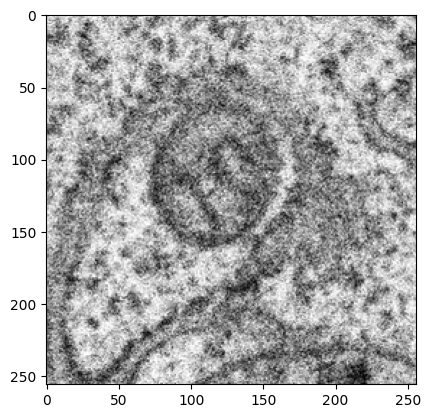

In [14]:
from IPython.display import display, Math
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(vol[15], cmap="gray")

<IPython.core.display.Math object>

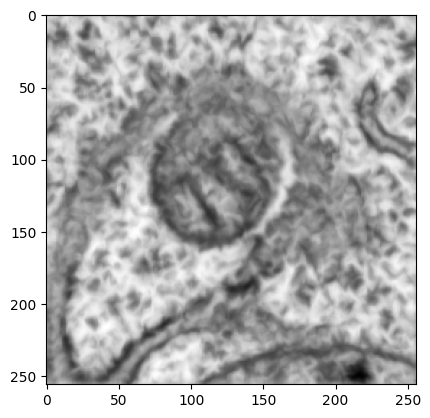

In [15]:
display(Math("\mathtt{Denoised~slice~using~OF~}(\sigma=2):"))
imgplot = plt.imshow(denoised_vol[15], cmap="gray")

<IPython.core.display.Math object>

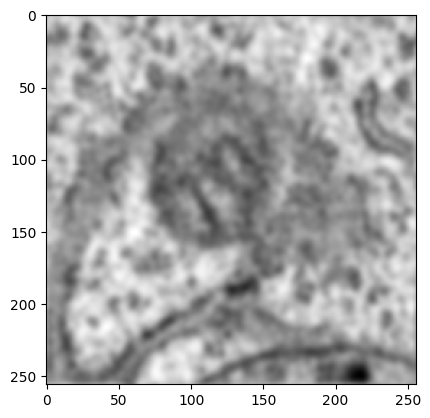

In [16]:
display(Math("\mathtt{Denoised~slice~using~standard~Gaussian~filtering~}(\sigma=2):"))
imgplot = plt.imshow(no_OF_denoised_vol[15], cmap="gray")

## 2. Controlling the length of the filters with the $\sigma$ parameters

### Example for $\sigma_\text{Z}=1.0, \sigma_\text{Y}=2.0~\text{and}~\sigma_\text{X}=0.1$
If $0<\sigma\le 0.1$, then no filtering is performed in the corresponding direction.

In [17]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o denoised_small_vol.mrc -s 1.0 2.0 0.1 -v 1 2>&1 | grep length

[2023-02-15 04:18:36,688] (INFO) length of each filter (Z, Y, X) = [9, 17, 1]
[2023-02-15 04:18:36,708] (INFO) Filtering along Z with l=0, w=5, and kernel length=9
[2023-02-15 04:18:38,447] (INFO) Filtering along Y with l=0, w=5, and kernel length=17
[2023-02-15 04:18:41,392] (INFO) Filtering along X with l=0, w=5, and kernel length=1
CPU times: user 135 ms, sys: 36 ms, total: 171 ms
Wall time: 6.36 s


<IPython.core.display.Math object>

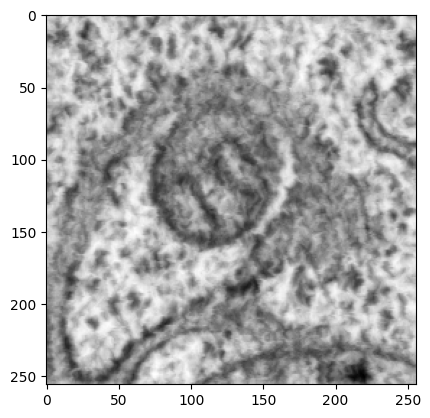

In [18]:
denoised_vol_MRC = mrcfile.open("denoised_small_vol.mrc")
denoised_vol = denoised_vol_MRC.data
display(Math("\mathtt{Denoised~slice~using~OF~}(\sigma_{\mathrm{Z}}=1.0, \sigma_{\mathrm{Y}}=2.0~\mathrm{and}~\sigma_{\mathrm{X}}=0.1):"))
imgplot = plt.imshow(denoised_vol[15], cmap="gray")

## 3. Controlling the search area with the `l` parameter

In [19]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o denoised_small_vol_l0.mrc -l 0 -v 1 2>&1 | grep "l="

[2023-02-15 04:18:43,703] (INFO) Filtering along Z with l=0, w=5, and kernel length=17
[2023-02-15 04:18:46,956] (INFO) Filtering along Y with l=0, w=5, and kernel length=17
[2023-02-15 04:18:50,018] (INFO) Filtering along X with l=0, w=5, and kernel length=17
CPU times: user 262 ms, sys: 41 ms, total: 303 ms
Wall time: 11.3 s


In [20]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o denoised_small_vol_l3.mrc -l 3 -v 1 2>&1 | grep "l="

[2023-02-15 04:18:55,034] (INFO) Filtering along Z with l=3, w=5, and kernel length=17
[2023-02-15 04:18:59,400] (INFO) Filtering along Y with l=3, w=5, and kernel length=17
[2023-02-15 04:19:02,329] (INFO) Filtering along X with l=3, w=5, and kernel length=17
CPU times: user 247 ms, sys: 62.7 ms, total: 310 ms
Wall time: 12 s


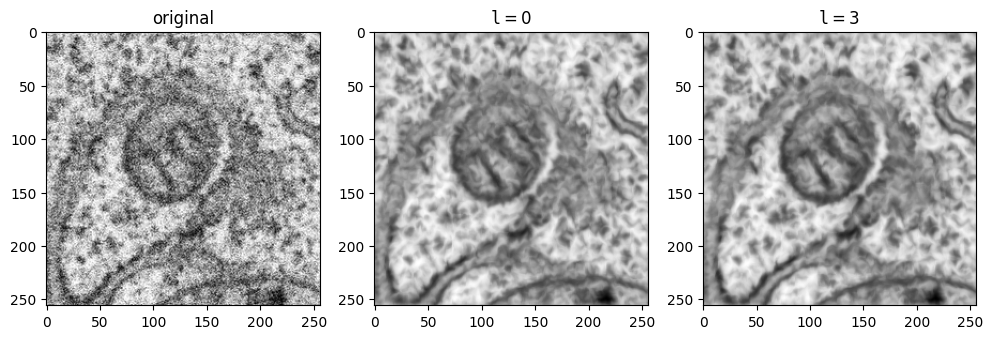

In [21]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
denoised_vol_MRC = mrcfile.open("denoised_small_vol_l0.mrc")
denoised_vol_l0 = denoised_vol_MRC.data
plt.subplot(1, 3, 1)
plt.title("original")
imgplot = plt.imshow(vol[15], cmap="gray")
plt.subplot(1, 3, 2)
plt.title(r"$\mathtt{l}=0$")
imgplot = plt.imshow(denoised_vol_l0[15], cmap="gray")
denoised_vol_MRC = mrcfile.open("denoised_small_vol_l3.mrc")
denoised_vol_l3 = denoised_vol_MRC.data
plt.subplot(1, 3, 3)
plt.title(r"$\mathtt{l}=3$")
imgplot = plt.imshow(denoised_vol_l3[15], cmap="gray")

## 4. Controlling the noise sensitivity with the `w` parameter

In [22]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o denoised_small_vol_w3.mrc -w 3 -v 1 2>&1 | grep "w="

[2023-02-15 04:19:08,476] (INFO) Filtering along Z with l=0, w=3, and kernel length=17
[2023-02-15 04:19:11,590] (INFO) Filtering along Y with l=0, w=3, and kernel length=17
[2023-02-15 04:19:14,484] (INFO) Filtering along X with l=0, w=3, and kernel length=17
CPU times: user 222 ms, sys: 41.3 ms, total: 263 ms
Wall time: 10.7 s


In [23]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o denoised_small_vol_w17.mrc -w 17 -v 1 2>&1 | grep "w="

[2023-02-15 04:19:19,291] (INFO) Filtering along Z with l=0, w=17, and kernel length=17
[2023-02-15 04:19:22,301] (INFO) Filtering along Y with l=0, w=17, and kernel length=17
[2023-02-15 04:19:25,296] (INFO) Filtering along X with l=0, w=17, and kernel length=17
CPU times: user 238 ms, sys: 49.6 ms, total: 288 ms
Wall time: 10.9 s


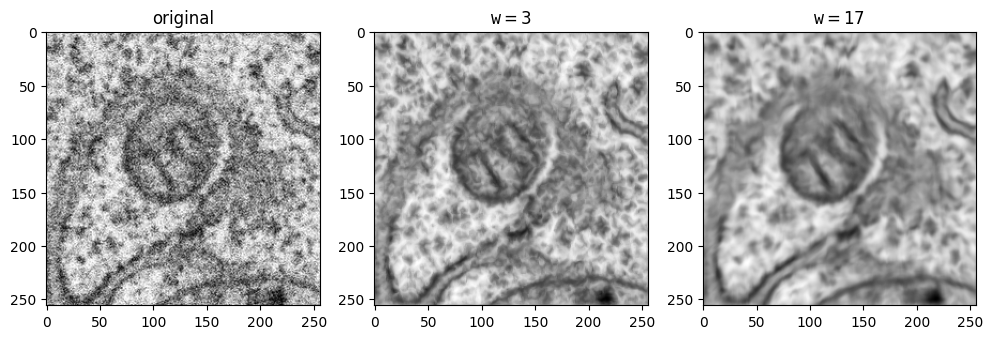

In [24]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
denoised_vol_MRC = mrcfile.open("denoised_small_vol_w3.mrc")
denoised_vol_w3 = denoised_vol_MRC.data
plt.subplot(1, 3, 1)
plt.title("original")
imgplot = plt.imshow(vol[15], cmap="gray")
plt.subplot(1, 3, 2)
plt.title(r"$\mathtt{w}=3$")
imgplot = plt.imshow(denoised_vol_w3[15], cmap="gray")
denoised_vol_MRC = mrcfile.open("denoised_small_vol_w17.mrc")
denoised_vol_w17 = denoised_vol_MRC.data
plt.subplot(1, 3, 3)
plt.title(r"$\mathtt{w}=17$")
imgplot = plt.imshow(denoised_vol_w17[15], cmap="gray")

## 4. Using a ("big") volume

In [25]:
%%bash
OUTPUT_FILENAME="big_vol.mrc"
if test ! -f $OUTPUT_FILENAME ; then
    FILEID="1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_"
    wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $OUTPUT_FILENAME && rm -rf /tmp/cookies.txt 2> /dev/null
fi

In [26]:
vol_MRC = mrcfile.open("big_vol.mrc")
vol = vol_MRC.data
print("(Z_size, Y_size, X_size) =", vol.shape)

(Z_size, Y_size, X_size) = (100, 1024, 1024)


In [27]:
%%time
!python ../flowdenoising_5.py -i big_vol.mrc -o denoised_big_vol.mrc -v 1 -l 0

[2023-02-15 04:19:32,285] (INFO) Verbosity level = 1
[2023-02-15 04:19:32,285] (INFO) 0 %
[2023-02-15 04:19:32,285] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-15 04:19:32,286] (INFO) reading "big_vol.mrc"
[2023-02-15 04:19:32,748] (INFO) shape of the input volume (Z, Y, X) = (100, 1024, 1024)
[2023-02-15 04:19:32,749] (INFO) type of the volume = float32
[2023-02-15 04:19:32,749] (INFO) vol requires 400.0 MB
[2023-02-15 04:19:32,798] (INFO) big_vol.mrc max = 255.0
[2023-02-15 04:19:32,847] (INFO) big_vol.mrc min = 0.0
[2023-02-15 04:19:32,907] (INFO) Input vol average = 164.70201110839844
[2023-02-15 04:19:32,907] (INFO) read "big_vol.mrc" in 0.6184182660000004 seconds
[2023-02-15 04:19:32,907] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:19:32,908] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:19:32,909] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:19:32,910] (INFO) length of each filter (Z, Y, X) = [17, 17, 17]
[2023-02-15 04:19:33,287] 

[2023-02-15 04:22:45,651] (INFO) Filtering along Y with l=0, w=5, and kernel length=17
[2023-02-15 04:22:46,507] (INFO) 0 %
[2023-02-15 04:22:47,509] (INFO) 0 %
[2023-02-15 04:22:48,510] (INFO) 0 %
[2023-02-15 04:22:49,511] (INFO) 0 %
[2023-02-15 04:22:50,513] (INFO) 0 %
[2023-02-15 04:22:51,514] (INFO) 0 %
[2023-02-15 04:22:52,515] (INFO) 0 %
[2023-02-15 04:22:53,516] (INFO) 0 %
[2023-02-15 04:22:54,517] (INFO) 0 %
[2023-02-15 04:22:55,518] (INFO) 0 %
[2023-02-15 04:22:56,520] (INFO) 0 %
[2023-02-15 04:22:57,520] (INFO) 0 %
[2023-02-15 04:22:58,522] (INFO) 0 %
[2023-02-15 04:22:59,523] (INFO) 0 %
[2023-02-15 04:23:00,524] (INFO) 0 %
[2023-02-15 04:23:01,525] (INFO) 0 %
[2023-02-15 04:23:02,526] (INFO) 0 %
[2023-02-15 04:23:03,527] (INFO) 0 %
[2023-02-15 04:23:04,528] (INFO) 0 %
[2023-02-15 04:23:05,530] (INFO) 0 %
[2023-02-15 04:23:06,530] (INFO) 0 %
[2023-02-15 04:23:07,532] (INFO) 0 %
[2023-02-15 04:23:08,533] (INFO) 0 %
[2023-02-15 04:23:09,534] (INFO) 0 %
[2023-02-15 04:23:10,535]

[2023-02-15 04:26:23,760] (INFO) 0 %
[2023-02-15 04:26:24,762] (INFO) 0 %
[2023-02-15 04:26:25,763] (INFO) 0 %
[2023-02-15 04:26:26,764] (INFO) 0 %
[2023-02-15 04:26:27,765] (INFO) 0 %
[2023-02-15 04:26:28,766] (INFO) 0 %
[2023-02-15 04:26:29,767] (INFO) 0 %
[2023-02-15 04:26:30,768] (INFO) 0 %
[2023-02-15 04:26:31,770] (INFO) 0 %
[2023-02-15 04:26:32,770] (INFO) 0 %
[2023-02-15 04:26:33,772] (INFO) 0 %
[2023-02-15 04:26:34,773] (INFO) 0 %
[2023-02-15 04:26:35,774] (INFO) 0 %
[2023-02-15 04:26:36,775] (INFO) 0 %
[2023-02-15 04:26:37,776] (INFO) 0 %
[2023-02-15 04:26:38,777] (INFO) 0 %
[2023-02-15 04:26:39,778] (INFO) 0 %
[2023-02-15 04:26:40,780] (INFO) 0 %
[2023-02-15 04:26:41,780] (INFO) 0 %
[2023-02-15 04:26:42,782] (INFO) 0 %
[2023-02-15 04:26:43,783] (INFO) 0 %
[2023-02-15 04:26:44,784] (INFO) 0 %
[2023-02-15 04:26:45,785] (INFO) 0 %
[2023-02-15 04:26:46,786] (INFO) 0 %
[2023-02-15 04:26:47,787] (INFO) 0 %
[2023-02-15 04:26:48,789] (INFO) 0 %
[2023-02-15 04:26:49,790] (INFO) 0 %
[

In [28]:
%%time
!python ../flowdenoising_6.py -i big_vol.mrc -o denoised_big_vol.mrc -v 1 -l 0

[2023-02-15 04:29:39,218] (INFO) Verbosity level = 1
[2023-02-15 04:29:39,219] (INFO) Number of processing units: 8
[2023-02-15 04:29:39,219] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-15 04:29:39,219] (INFO) reading "big_vol.mrc"
[2023-02-15 04:29:39,668] (INFO) shape of the input volume (Z, Y, X) = (100, 1024, 1024)
[2023-02-15 04:29:39,669] (INFO) type of the volume = float32
[2023-02-15 04:29:39,669] (INFO) vol requires 400.0 MB
[2023-02-15 04:29:39,717] (INFO) big_vol.mrc max = 255.0
[2023-02-15 04:29:39,764] (INFO) big_vol.mrc min = 0.0
[2023-02-15 04:29:39,823] (INFO) Input vol average = 164.70201110839844
[2023-02-15 04:29:39,824] (INFO) read "big_vol.mrc" in 0.6027831900000002 seconds
[2023-02-15 04:29:39,824] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:29:39,825] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:29:39,826] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 04:29:39,827] (INFO) length of each filter (Z, Y, X) = [17, 17, 17]


[2023-02-15 04:32:52,004] (INFO) 5 %
[2023-02-15 04:32:53,006] (INFO) 5 %
[2023-02-15 04:32:54,007] (INFO) 6 %
[2023-02-15 04:32:55,008] (INFO) 6 %
[2023-02-15 04:32:56,010] (INFO) 6 %
[2023-02-15 04:32:57,010] (INFO) 7 %
[2023-02-15 04:32:58,012] (INFO) 7 %
[2023-02-15 04:32:59,013] (INFO) 7 %
[2023-02-15 04:33:00,014] (INFO) 7 %
[2023-02-15 04:33:01,015] (INFO) 8 %
[2023-02-15 04:33:02,017] (INFO) 8 %
[2023-02-15 04:33:03,017] (INFO) 8 %
[2023-02-15 04:33:04,018] (INFO) 8 %
[2023-02-15 04:33:05,020] (INFO) 8 %
[2023-02-15 04:33:06,020] (INFO) 9 %
[2023-02-15 04:33:07,022] (INFO) 9 %
[2023-02-15 04:33:08,023] (INFO) 9 %
[2023-02-15 04:33:09,024] (INFO) 10 %
[2023-02-15 04:33:10,025] (INFO) 10 %
[2023-02-15 04:33:11,027] (INFO) 10 %
[2023-02-15 04:33:12,027] (INFO) 10 %
[2023-02-15 04:33:13,028] (INFO) 10 %
[2023-02-15 04:33:14,030] (INFO) 11 %
[2023-02-15 04:33:15,030] (INFO) 11 %
[2023-02-15 04:33:16,032] (INFO) 11 %
[2023-02-15 04:33:17,033] (INFO) 11 %
[2023-02-15 04:33:18,035] (IN

[2023-02-15 04:36:26,276] (INFO) 57 %
[2023-02-15 04:36:27,277] (INFO) 58 %
[2023-02-15 04:36:28,278] (INFO) 58 %
[2023-02-15 04:36:29,280] (INFO) 58 %
[2023-02-15 04:36:30,280] (INFO) 58 %
[2023-02-15 04:36:31,282] (INFO) 58 %
[2023-02-15 04:36:32,283] (INFO) 59 %
[2023-02-15 04:36:33,285] (INFO) 59 %
[2023-02-15 04:36:34,287] (INFO) 59 %
[2023-02-15 04:36:35,288] (INFO) 59 %
[2023-02-15 04:36:36,290] (INFO) 60 %
[2023-02-15 04:36:37,290] (INFO) 60 %
[2023-02-15 04:36:38,292] (INFO) 60 %
[2023-02-15 04:36:39,293] (INFO) 60 %
[2023-02-15 04:36:40,294] (INFO) 60 %
[2023-02-15 04:36:41,295] (INFO) 61 %
[2023-02-15 04:36:42,297] (INFO) 61 %
[2023-02-15 04:36:43,298] (INFO) 61 %
[2023-02-15 04:36:44,300] (INFO) 61 %
[2023-02-15 04:36:45,300] (INFO) 62 %
[2023-02-15 04:36:46,302] (INFO) 62 %
[2023-02-15 04:36:47,303] (INFO) 62 %
[2023-02-15 04:36:48,304] (INFO) 62 %
[2023-02-15 04:36:49,305] (INFO) 62 %
[2023-02-15 04:36:50,306] (INFO) 63 %
[2023-02-15 04:36:51,307] (INFO) 63 %
[2023-02-15 

In [29]:
%%time
!python ../flowdenoising_6.py -i big_vol.mrc -o no_OF_denoised_big_vol.mrc --no_OF 

CPU times: user 1.85 s, sys: 294 ms, total: 2.14 s
Wall time: 34.5 s


In [30]:
denoised_vol_MRC = mrcfile.open("denoised_big_vol.mrc")
denoised_vol = denoised_vol_MRC.data
no_OF_denoised_vol_MRC = mrcfile.open("no_OF_denoised_big_vol.mrc")
no_OF_denoised_vol = no_OF_denoised_vol_MRC.data

<IPython.core.display.Math object>

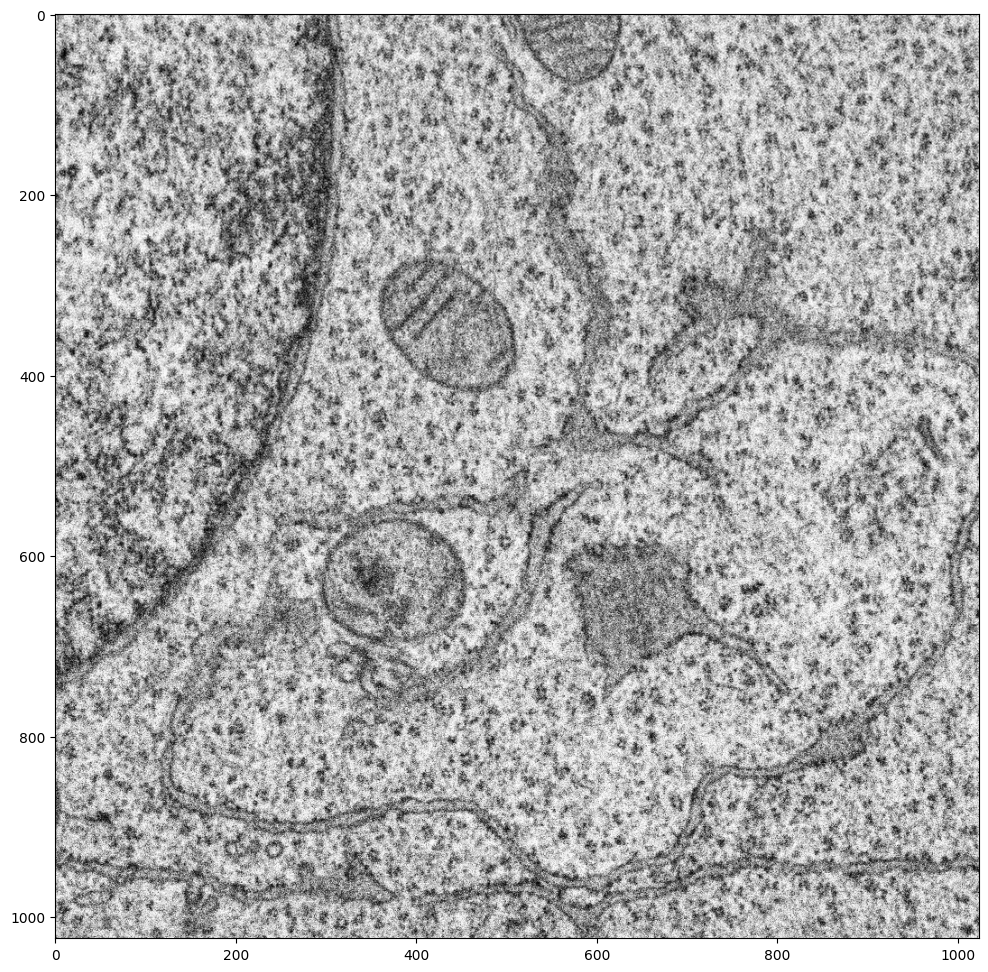

In [31]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(vol[vol.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

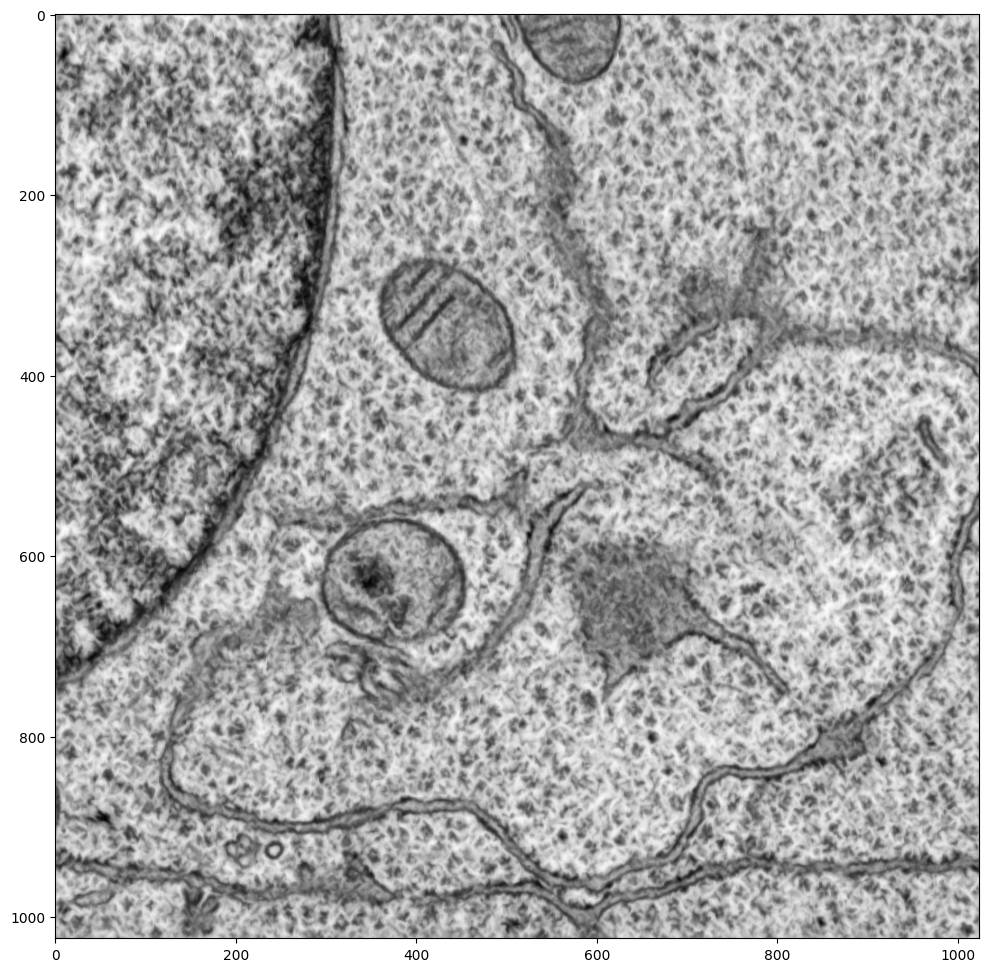

In [32]:
display(Math("\mathtt{Denoised~slice~using~OF}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(denoised_vol[vol.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

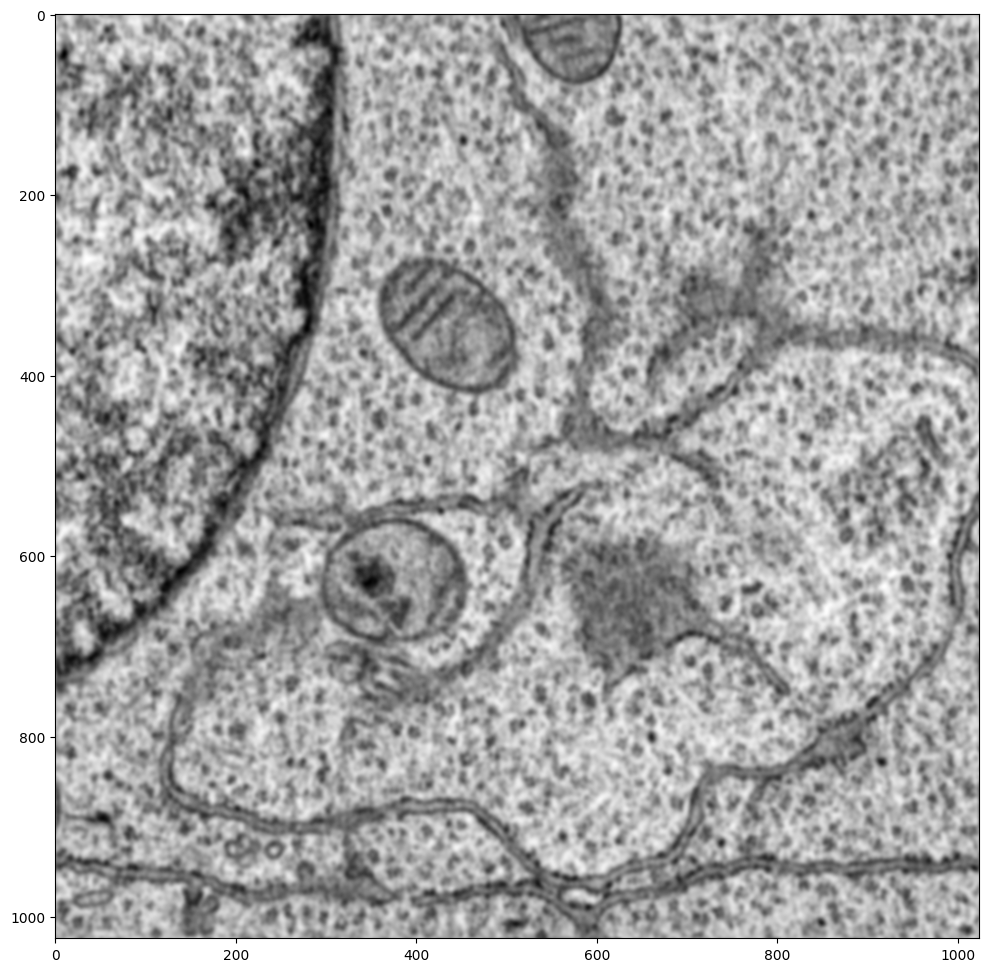

In [33]:
display(Math("\mathtt{Denoised~slice~using~standard~Gaussian~filtering}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(no_OF_denoised_vol[vol.shape[0]//2], cmap="gray")